In [2]:
# Importação das biblíotecas relevantes para o projeto
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.float_format = "{:,.2f}".format

In [47]:
# Cria lista na mão dos códigos UF e os UFs
uf_number_code = pd.DataFrame({"uf_code":["11", "12", "13", "14", "15", "16", "17", "21", "22", "23", "24", "25", "26", "27",
                                          "28", "29", "31", "32", "33", "35", "41", "42", "43", "50", "51", "52", "53"],
                               "uf":["RO", "AC", "AM", "RR", "PA", "AP", "TO", "MA", "PI", "CE", "RN", "PB", "PE", "AL",
                                       "SE", "BA", "MG", "ES", "RJ", "SP", "PR", "SC", "RS", "MS", "MT", "GO", "DF"]})
color = {"RO":'darkgrey', "AC":'darkgrey', "AM":'darkgrey', "RR":'darkgrey', "PA":'darkgrey', "AP":'darkgrey', "TO":'darkgrey', "MA":'darkgrey', "PI":'darkgrey', "CE":'darkgrey',
         "RN":'darkgrey', "PB":'darkgrey', "PE":'darkgrey', "AL":'darkgrey', "SE":'darkgrey', "BA":'darkgrey', "MG":'#CFE8F3', "ES":'#CFE8F3', "RJ":'#CFE8F3', "SP":'#1696D2',
         "PR":'#DB2B27', "SC":'#F8D5D4', "RS":'#F8D5D4', "MS":'darkgrey', "MT":'darkgrey', "GO":'darkgrey', "DF":'darkgrey'}

In [4]:
# URL do arquivo CSV
filePath = 'https://raw.githubusercontent.com/fdrigui/BootcampDataScience/main/module_one/dados/A225356189_28_143_208(atend).csv'

# Abre arquivo
df_atend = pd.read_csv(filePath, sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=12, na_values='-')
df_atend.columns = df_atend.columns.str.replace('/', '-')
df_atend = df_atend.rename(columns={'Unidade da Federação':'uf_code_and_name'})
df_atend[['uf_code', 'uf_name']] = df_atend['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
df_atend = df_atend.dropna(axis=1, how='any')
df_atend['uf'] = df_atend['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
df_atend['uf_i'] = df_atend['uf']
df_atend = df_atend.set_index('uf_i')
df_atend['2008-Jan'] = df_atend['2008-Fev']
df_atend_t = df_atend.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf', 'uf_name'], axis=1).T.loc['2008-Jan':'2019-Dez', :].copy()
df_atend_t[['ano', 'mes']] = df_atend_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})

In [5]:
atend_final = df_atend_t.groupby('ano').mean().loc[:,'MG':'RS']

[]

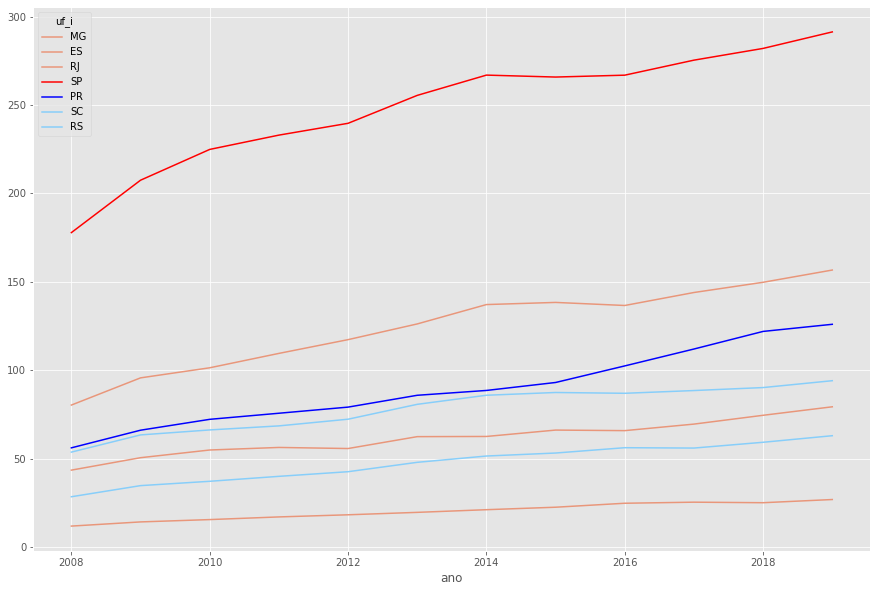

In [6]:
(atend_final.groupby('ano').mean()/1e6).loc[:,'MG':'RS'].plot(figsize=(15,10), color=atend_final.groupby('ano').mean().columns.map(color))
plt.plot()

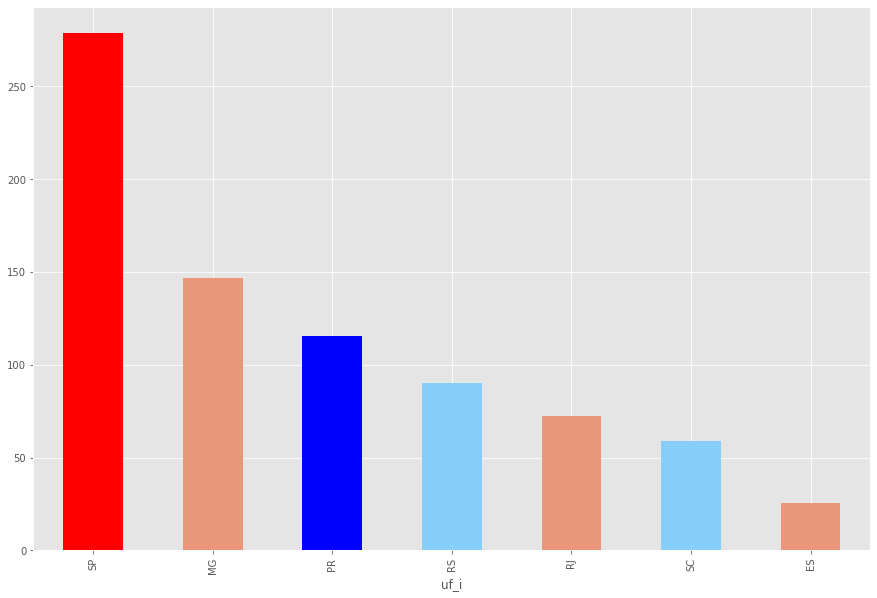

In [7]:
#Média dos ultimos 4 anos (2016-2019) dos valores totais gastos por estado
(atend_final.groupby('ano').mean().loc['2016':].mean().sort_values(ascending=False)/1e6).plot(figsize=(15,10), kind='bar', color = atend_final.groupby('ano').mean().loc['2016':].mean().sort_values(ascending=False).index.map(color))
plt.show()

In [8]:
ahi = pd.read_csv('dados/AIH_aprovadas.csv', sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=11, na_values='-')
ahi.columns = ahi.columns.str.replace('/', '-')
ahi = ahi.rename(columns={'Unidade da Federação':'uf_code_and_name'})
ahi[['uf_code', 'uf_name']] = ahi['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
ahi = ahi.dropna(axis=1, how='any')
ahi['uf'] = ahi['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
ahi['uf_i'] = ahi['uf']
ahi = ahi.set_index('uf_i')
ahi['2008-Jan'] = ahi['2008-Fev']
ahi_1 = ahi.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf'], axis=1)
ahi_t = ahi_1.T.loc['2008-Jan':'2019-Dez', :].copy()
ahi_t = ahi_t.drop('Total', axis=1)
ahi_t[['ano', 'mes']] = ahi_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})

In [9]:
ahi_final = ahi_t.groupby('ano').mean().loc[:,'MG':'RS']
ahi_final

uf_i,MG,ES,RJ,SP,PR,SC,RS
ano,,,,,,,
2008,"94,496.17","15,712.25","58,819.83","192,595.25","62,579.67","31,432.67","59,984.17"
2009,"94,111.67","16,370.17","58,082.17","197,321.33","65,469.50","32,821.83","61,222.83"
2010,"95,762.50","16,799.25","60,487.08","203,985.25","67,284.25","32,753.00","60,639.92"
2011,"96,743.67","18,094.92","59,394.00","203,122.00","64,567.67","33,670.58","59,622.42"
2012,"98,528.50","18,171.67","55,603.92","202,600.67","65,354.17","34,436.08","60,705.92"
2013,"99,583.58","17,966.75","57,226.75","201,077.83","64,422.42","35,087.83","61,890.33"
2014,"102,970.92","18,929.83","56,234.58","204,762.42","64,073.17","36,571.33","64,036.33"
2015,"100,858.75","19,261.25","58,504.67","202,060.58","64,612.50","37,736.08","63,565.33"
2016,"98,869.50","19,607.83","55,697.67","202,005.58","67,752.58","39,652.33","62,769.00"


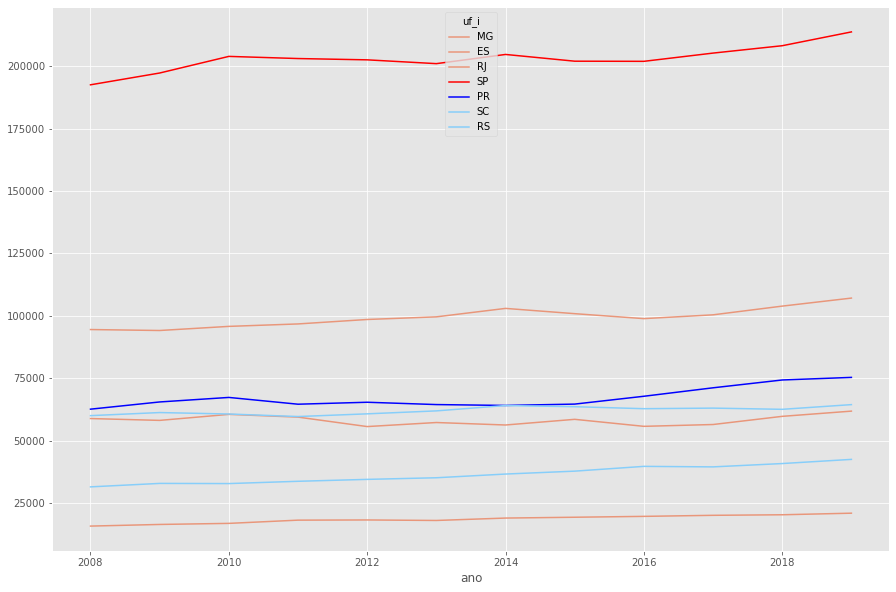

In [10]:
ahi_final.plot(figsize=(15,10), color=ahi_final.columns.map(color))
plt.show()

<AxesSubplot:xlabel='uf_i'>

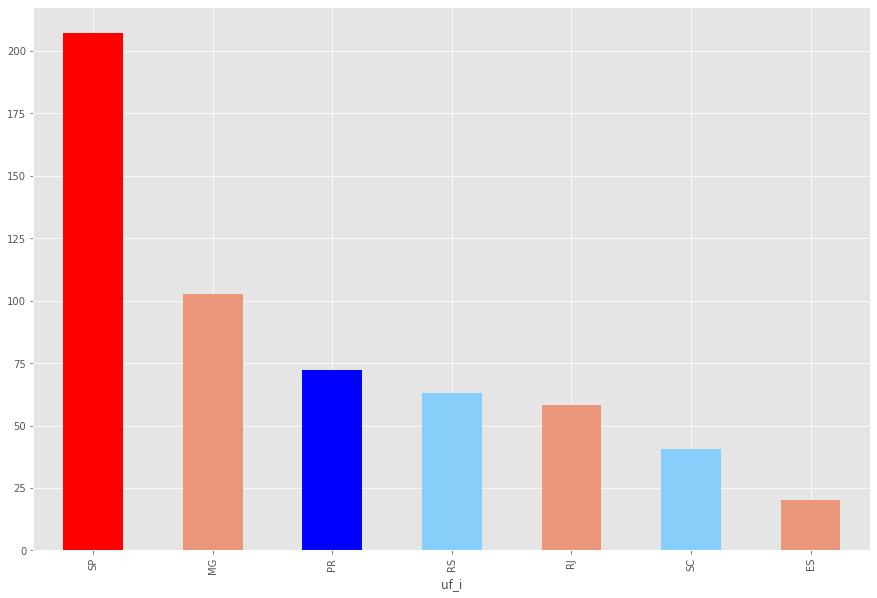

In [11]:
(ahi_final.loc['2016':].mean().sort_values(ascending=False)/1e3).plot(figsize=(15,10), kind='bar', color = ahi_final.loc['2016':].mean().sort_values(ascending=False).index.map(color))

In [12]:
hserv = pd.read_csv('dados/h_serv.csv', sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=11, na_values='-')
hserv.columns = hserv.columns.str.replace('/', '-')
hserv = hserv.rename(columns={'Unidade da Federação':'uf_code_and_name'})
hserv[['uf_code', 'uf_name']] = hserv['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
hserv = hserv.dropna(axis=1, how='any')
hserv['uf'] = hserv['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
hserv['uf_i'] = hserv['uf']
hserv = hserv.set_index('uf_i')
hserv['2008-Jan'] = hserv['2008-Fev']
hserv_1 = hserv.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf'], axis=1)
hserv_t = hserv_1.T.loc['2008-Jan':'2019-Dez', :].copy()
hserv_t = hserv_t.drop('Total', axis=1)
hserv_t[['ano', 'mes']] = hserv_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})

In [13]:
hserv_final = hserv_t.groupby('ano').mean().loc[:,'MG':'RS']

[]

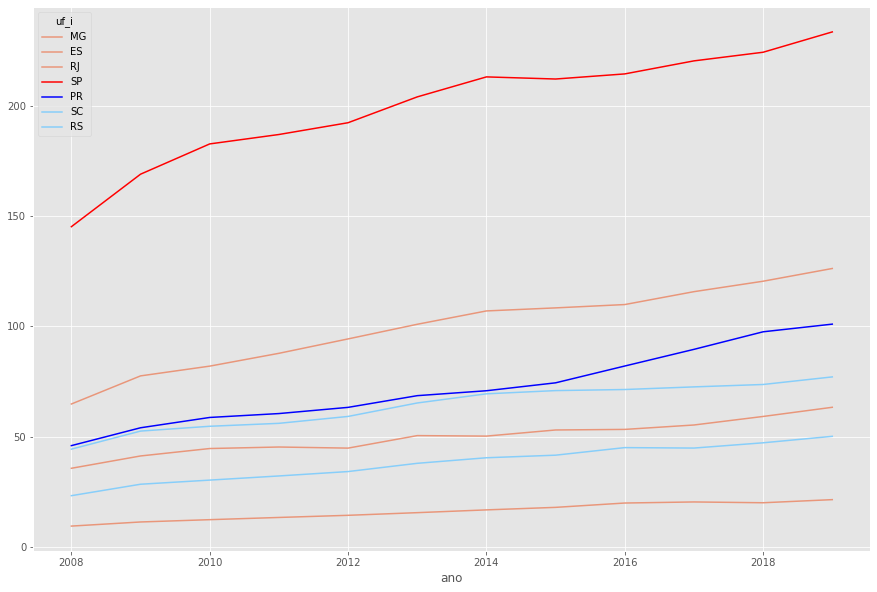

In [14]:
(hserv_final/1e6).plot(figsize=(15,10), color=hserv_final.columns.map(color))
plt.plot()

<AxesSubplot:xlabel='uf_i'>

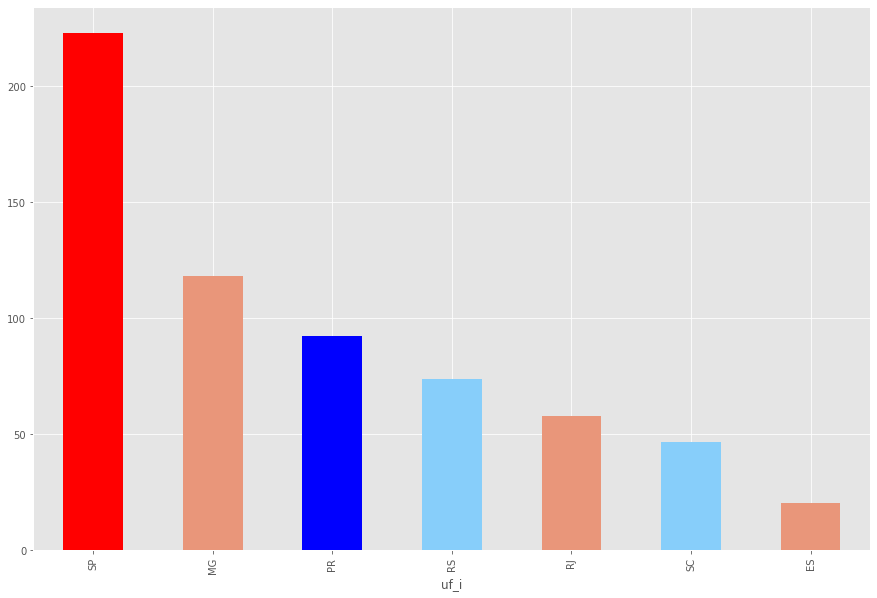

In [15]:
(hserv_final.loc['2016':].mean().sort_values(ascending=False)/1e6).plot(figsize=(15,10), kind='bar', color = hserv_final.loc['2016':].mean().sort_values(ascending=False).index.map(color))

In [16]:
pserv = pd.read_csv('dados/prof_serv.csv', sep=';', decimal=',', thousands='.', engine='python', encoding='ISO-8859-1', skiprows=3, skipfooter=11, na_values='-')
pserv.columns = pserv.columns.str.replace('/', '-')
pserv = pserv.rename(columns={'Unidade da Federação':'uf_code_and_name'})
pserv[['uf_code', 'uf_name']] = pserv['uf_code_and_name'].str.split(' ',n=1, expand=True).rename(columns={0:'uf_code', 1:'uf_name'})
pserv = pserv.dropna(axis=1, how='any')
pserv['uf'] = pserv['uf_code'].replace(uf_number_code['uf_code'].array,uf_number_code['uf'].array)
pserv['uf_i'] = pserv['uf']
pserv = pserv.set_index('uf_i')
pserv['2008-Jan'] = pserv['2008-Fev']
pserv_1 = pserv.drop(['uf_code_and_name', 'Total', 'uf_code', 'uf'], axis=1)
pserv_t = pserv_1.T.loc['2008-Jan':'2019-Dez', :].copy()
pserv_t = pserv_t.drop('Total', axis=1)
pserv_t[['ano', 'mes']] = pserv_t.index.to_series().str.split('-',n=1, expand=True).rename(columns={0:'ano', 1:'mes'})

In [17]:
pserv_final = pserv_t.groupby('ano').mean().loc[:,'MG':'RS']

<AxesSubplot:xlabel='ano'>

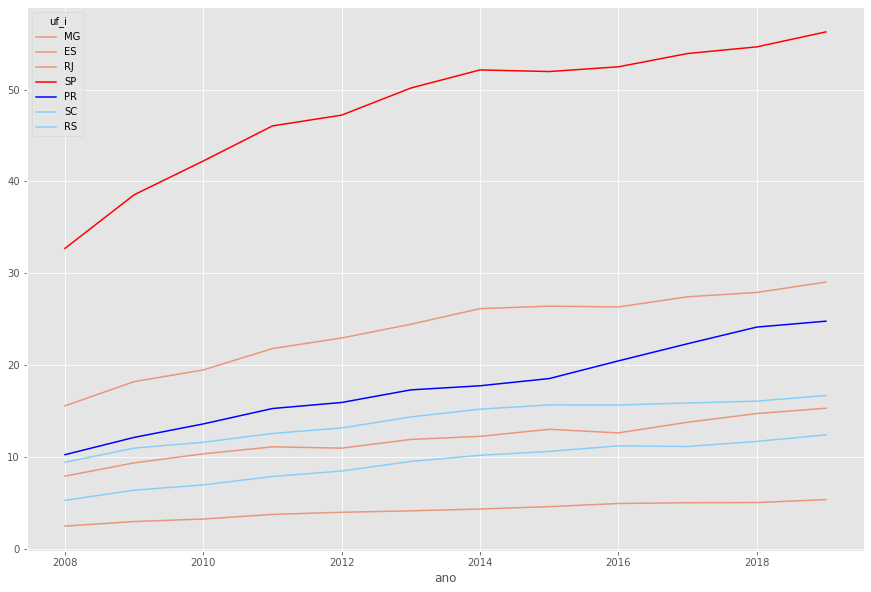

In [18]:
(pserv_final/1e6).plot(figsize=(15,10), color=pserv_final.columns.map(color))

<AxesSubplot:xlabel='uf_i'>

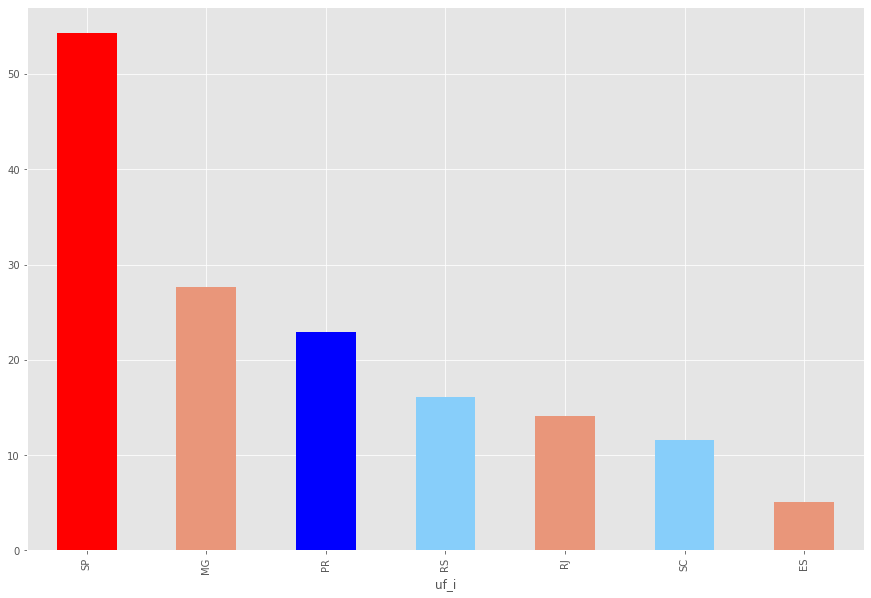

In [19]:
(pserv_final.loc['2016':].mean().sort_values(ascending=False)/1e6).plot(figsize=(15,10), kind='bar', color = pserv_final.loc['2016':].mean().sort_values(ascending=False).index.map(color))

<BarContainer object of 7 artists>

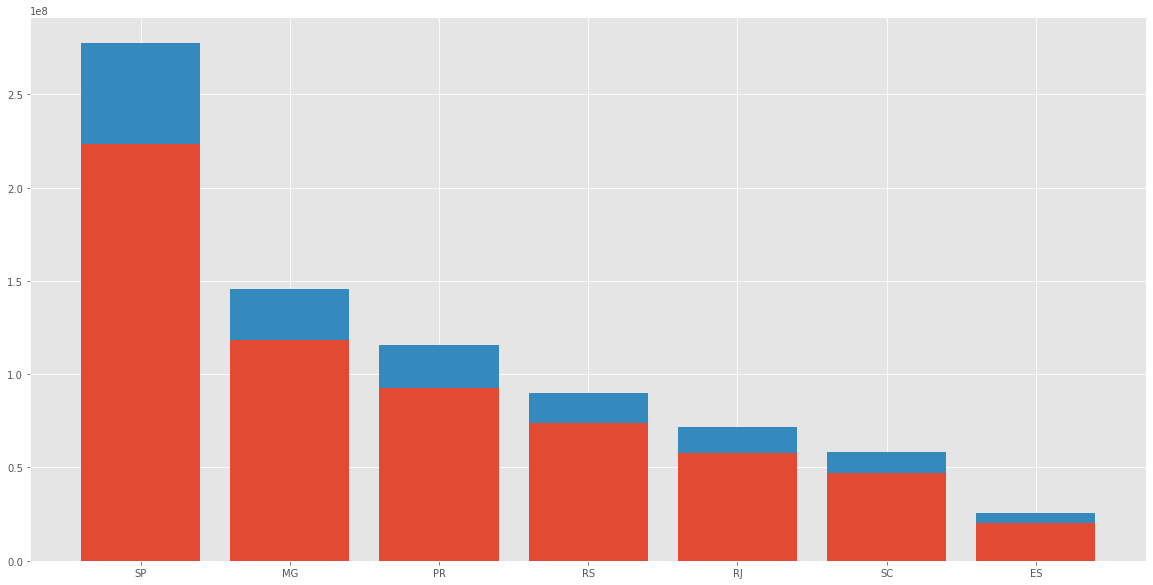

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
x = hserv_final.loc['2016':].mean(axis=0).sort_values(ascending=False).index.to_series()
height_hserv = hserv_final.loc['2016':].mean(axis=0).sort_values(ascending=False)
height_pserv = pserv_final.loc['2016':].mean(axis=0)[x]
ax.bar(x=x, height=height_hserv)
ax.bar(x=x, height=height_pserv, bottom=height_hserv)

In [21]:
# R$ por AHI
valor_por_ahi = atend_final.div(ahi_final, axis=1)
valor_por_ahi

uf_i,MG,ES,RJ,SP,PR,SC,RS
ano,,,,,,,
2008,850.72,762.68,741.50,923.52,898.25,908.95,896.80
2009,"1,017.56",876.26,871.86,"1,051.53","1,010.91","1,061.92","1,037.53"
2010,"1,059.49",932.19,909.13,"1,102.46","1,074.95","1,138.89","1,093.86"
2011,"1,132.79",948.73,950.21,"1,146.93","1,173.46","1,190.95","1,150.90"
2012,"1,191.22","1,010.94","1,003.94","1,182.84","1,212.36","1,240.71","1,192.62"
2013,"1,267.74","1,098.84","1,092.83","1,270.29","1,333.66","1,368.70","1,305.65"
2014,"1,332.35","1,122.56","1,113.96","1,303.40","1,383.59","1,410.54","1,341.98"
2015,"1,372.28","1,175.96","1,132.41","1,315.41","1,441.68","1,411.89","1,376.49"
2016,"1,382.36","1,269.63","1,183.85","1,321.02","1,513.15","1,419.57","1,386.72"


<AxesSubplot:xlabel='ano'>

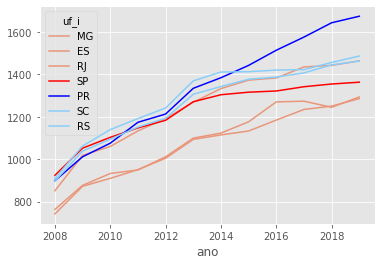

In [22]:
valor_por_ahi.plot(color=valor_por_ahi.columns.map(color))

<AxesSubplot:xlabel='uf_i'>

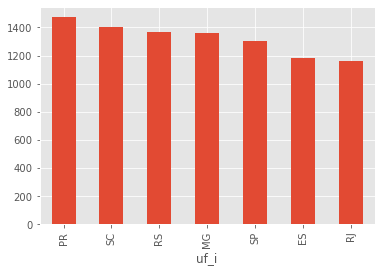

In [23]:
valor_por_ahi.loc['20116':].mean().sort_values(ascending=False).plot(kind='bar')

In [24]:
# R$ em serviços hospitalares por ahi
hserv_por_ahi = hserv_final.div(ahi_final, axis=1)
hserv_por_ahi

uf_i,MG,ES,RJ,SP,PR,SC,RS
ano,,,,,,,
2008,685.97,605.18,606.93,753.67,734.45,740.86,739.65
2009,824.13,694.82,710.76,856.18,825.61,867.51,858.40
2010,856.09,739.09,738.16,895.44,872.82,926.38,902.57
2011,907.40,741.70,763.28,920.24,936.86,957.00,940.28
2012,957.19,792.01,806.36,948.95,968.52,993.61,975.00
2013,"1,013.66",867.89,882.58,"1,014.34","1,064.85","1,081.59","1,054.87"
2014,"1,039.02",890.26,894.11,"1,040.34","1,105.49","1,106.55","1,084.26"
2015,"1,074.47",934.20,906.83,"1,049.49","1,151.73","1,103.38","1,115.33"
2016,"1,111.34","1,017.94",957.23,"1,061.23","1,210.72","1,136.53","1,137.25"


<AxesSubplot:xlabel='ano'>

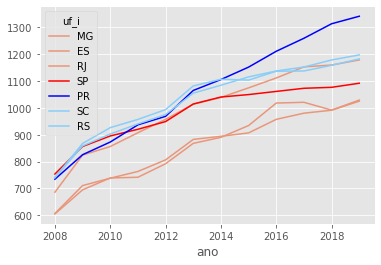

In [25]:
hserv_por_ahi.plot(color=hserv_por_ahi.columns.map(color))

<AxesSubplot:xlabel='uf_i'>

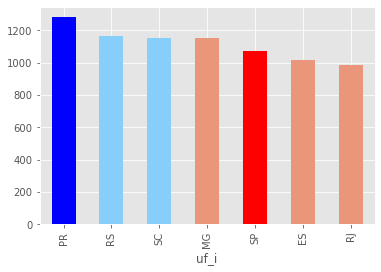

In [26]:
hserv_por_ahi.loc['2016':].mean().sort_values(ascending=False).plot(kind='bar', color=hserv_por_ahi['2016':].mean().sort_values(ascending=False).index.map(color))

In [27]:
# R$ em serviços hospitalares por ahi
pserv_por_ahi = pserv_final.div(ahi_final, axis=1)
pserv_por_ahi

uf_i,MG,ES,RJ,SP,PR,SC,RS
ano,,,,,,,
2008,164.75,157.50,134.57,169.85,163.80,168.08,157.15
2009,193.43,181.44,161.10,195.35,185.30,194.41,179.12
2010,203.40,193.10,170.97,207.01,202.13,212.51,191.30
2011,225.38,207.03,186.94,226.69,236.60,233.95,210.62
2012,232.97,218.92,197.16,233.08,243.80,246.01,216.79
2013,245.55,230.26,208.12,249.50,268.63,271.21,231.99
2014,253.94,229.06,217.80,254.64,277.06,278.43,237.45
2015,261.95,238.42,222.39,257.17,286.88,281.04,246.55
2016,266.35,251.69,226.62,259.79,302.00,282.75,249.48


<AxesSubplot:xlabel='ano'>

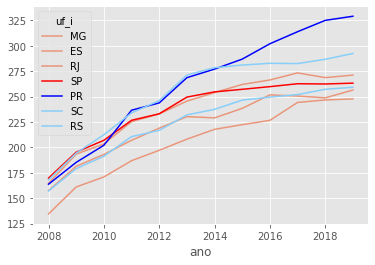

In [28]:
pserv_por_ahi.plot(color=pserv_por_ahi.columns.map(color))

<AxesSubplot:xlabel='uf_i'>

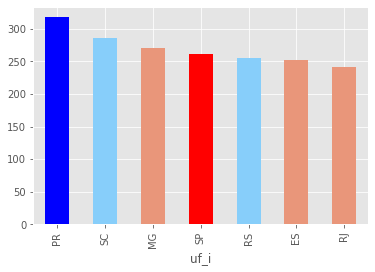

In [29]:
pserv_por_ahi.loc['2016':].mean().sort_values(ascending=False).plot(kind='bar', color=pserv_por_ahi['2016':].mean().sort_values(ascending=False).index.map(color))

<BarContainer object of 7 artists>

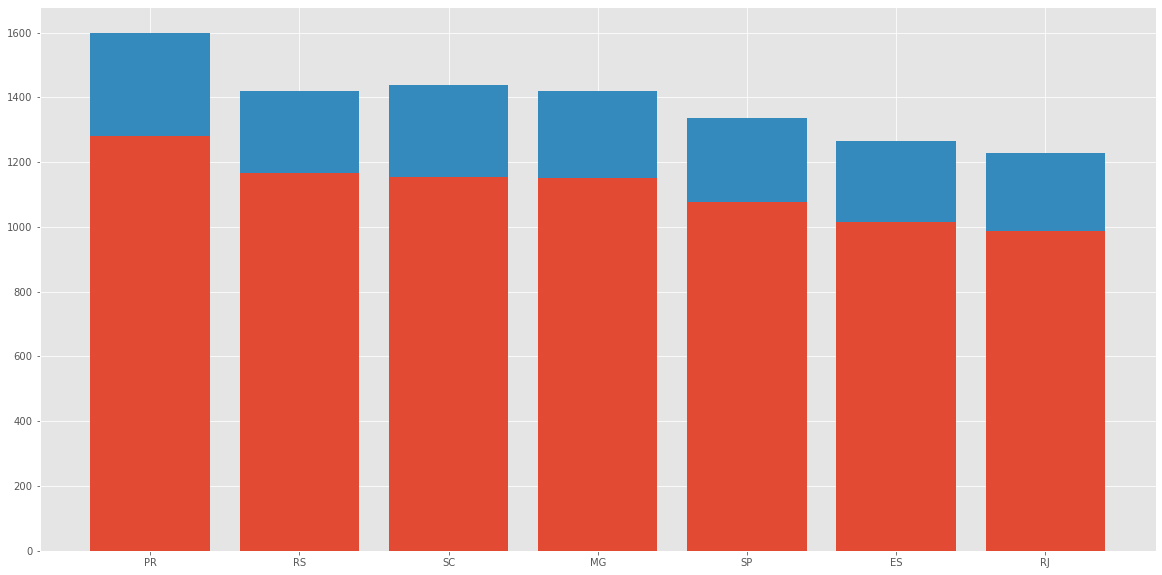

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
x = hserv_por_ahi.loc['2016':].mean(axis=0).sort_values(ascending=False).index.to_series()
height_hserv = hserv_por_ahi.loc['2016':].mean(axis=0).sort_values(ascending=False)
height_pserv = pserv_por_ahi.loc['2016':].mean(axis=0)[x]
ax.bar(x=x, height=height_hserv)
ax.bar(x=x, height=height_pserv, bottom=height_hserv)

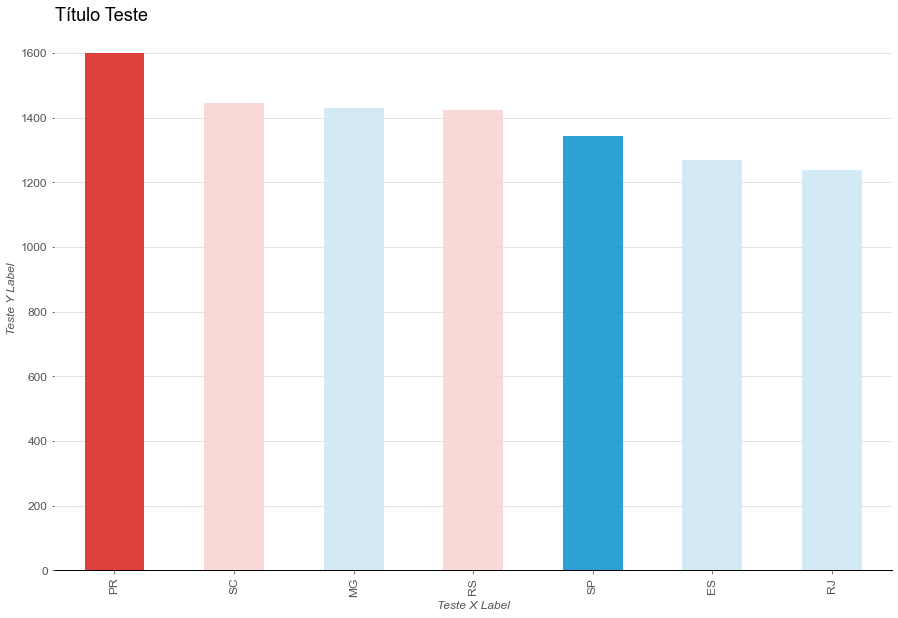

In [54]:
plt.figure(figsize=(15,10))
ax = valor_por_ahi.loc['2016':].mean().sort_values(ascending=False).plot(kind='bar', color=valor_por_ahi.loc['2016':].mean().sort_values(ascending=False).index.map(color), alpha=0.9)
ax = plt.bar()
ax.set_title('Título Teste', fontsize=18, loc='left', family='Arial')
ax.set_xlabel('Teste X Label', fontsize=12, family='Arial', style='italic')
ax.set_ylabel('Teste Y Label', fontsize=12, family='Arial', style='italic')
ax.grid(b=True, axis='y', color='#DEDDDD', which='major')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.set_facecolor('xkcd:white')
plt.yticks(fontname = "Arial", fontsize=12)
plt.xticks(fontname = "Arial", fontsize=12)
#ax.yaxis.set_major_formatter(ticks_y)
plt.show()

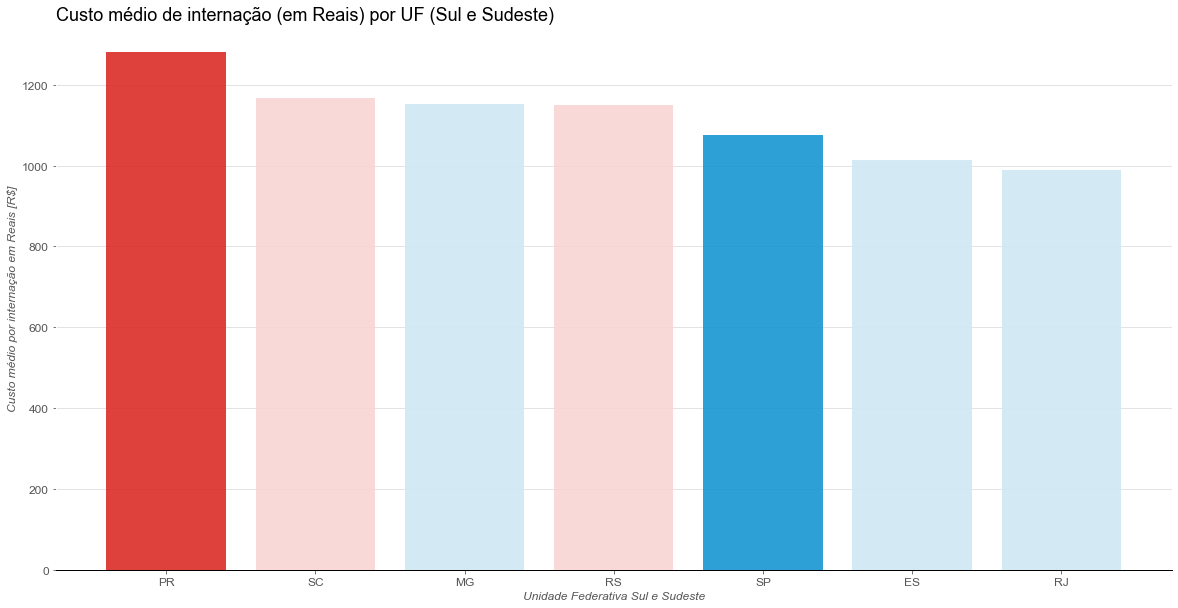

In [82]:
fig, ax = plt.subplots(figsize=(20,10))
x = valor_por_ahi.loc['2016':].mean().sort_values(ascending=False).index
height = valor_por_ahi.loc['2016':].mean().sort_values(ascending=False)
ax.bar(x=x, height=height_hserv, color=valor_por_ahi.loc['2016':].mean().sort_values(ascending=False).index.map(color), alpha=0.9)
ax.set_title('Custo médio de internação (em Reais) por UF (Sul e Sudeste)', fontsize=18, loc='left', family='Arial')
ax.set_xlabel('Unidade Federativa Sul e Sudeste', fontsize=12, family='Arial', style='italic')
ax.set_ylabel('Custo médio por internação em Reais [R$]', fontsize=12, family='Arial', style='italic')
ax.grid(b=True, axis='y', color='#DEDDDD', which='major')
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.set_facecolor('xkcd:white')
plt.yticks(fontname = "Arial", fontsize=12)
plt.xticks(fontname = "Arial", fontsize=12)
plt.show()
